# Lab 3-1: Exploratory Data Analysis.
---

In [6]:
import warnings # This library is used to ignore warnings, don't worry about it for now
warnings.filterwarnings('ignore')

## Introduction to Pandas

Pandas is probably the most widely used library for data manipulation and analysis in Python. You will use it a lot during this course. Let's learn some of its functionalities.

pandas.DataFrame is a 2-dimensional data structure with columns of potentially different types. You can think of it like an Excel spreadsheet. It is generally the most commonly used pandas object and works great for storing and analyzing data.

<br/><br/>
<center>
<img src="imgs/characters.png" height="250">
</center>
<br/><br/>


Let's imagine we want to create a DataFrame that contains the information about characters from the **critically-acclaimed 2019 game Disco Elysium**. This would be an example to learn how to create a DataFrame from scratch and perform some basic operations on it.

In [7]:
# First, initialize an empty DataFrame

import pandas as pd

df = pd.DataFrame()

# Now, let's create the columns as lists

first_names = ['Harry', 'Kim', 'Lawrence', 'Joyce', 'Jules', 'Goracy']
last_names =  ['Du Bois', 'Kitsuragi', 'Garte', 'Messier', 'Pidieu', 'Kubek']
ages = [44, 43, 28, 48, 68, 39]
occupations = ['Cop', 'Cop', 'Bartender', 'Landlady', 'Cop', 'Cook']
origins = ['Revachol', 'Revachol', 'Revachol', 'Revachol', 'Unknown', 'Graad']

# Let's add the columns to the DataFrame

df['first_name'] = first_names
df['last_name'] = last_names
df['age'] = ages
df['occupation'] = occupations
df['origin'] = origins

# Let's take a peek at the first 5 rows of the DataFrame. Another method, tail(), would show the last 5 rows.
df.head()

,first_name,last_name,age,occupation,origin
0,Harry,Du Bois,44,Cop,Revachol
1,Kim,Kitsuragi,43,Cop,Revachol
2,Lawrence,Garte,28,Bartender,Revachol
3,Joyce,Messier,48,Landlady,Revachol
4,Jules,Pidieu,68,Cop,Unknown


In [8]:
# We can also create a DataFrame from a dictionary

data = {'first_name': first_names, # column name: column values
        'last_name': last_names, 
        'age': ages, 
        'occupation': occupations,
        'origin': origins}

df = pd.DataFrame(data)
df.head() 

# It's the same as before!

,first_name,last_name,age,occupation,origin
0,Harry,Du Bois,44,Cop,Revachol
1,Kim,Kitsuragi,43,Cop,Revachol
2,Lawrence,Garte,28,Bartender,Revachol
3,Joyce,Messier,48,Landlady,Revachol
4,Jules,Pidieu,68,Cop,Unknown


In [10]:
# We can access the columns of the DataFrame using the column name. This will return a pandas Series, 
# which is a one-dimensional labeled array (similar to a Python dictionary). It is the building block 
# of pandas DataFrames and contains index values [0, 1, 2, ..., n] as the 'dictionary keys' and our 
# data as the 'dictionary values'. 

# You won't need to work with pandas Series objects as often as with DataFrames, but it's good to know 
# they exist.

# Let's see the first names of the characters only.

first_names = df['first_name']
print(f"What we got is a pandas.Series object:")
print(first_names, '\n')

# pandas.Series can be converted to an ordinary Python list using the tolist() method
names_list = first_names.tolist()
print(f"Now it's a Python list:")
print(names_list)

What we got is a pandas.Series object:
0       Harry
1         Kim
2    Lawrence
3       Joyce
4       Jules
5      Goracy
Name: first_name, dtype: object 

Now it's a Python list:
['Harry', 'Kim', 'Lawrence', 'Joyce', 'Jules', 'Goracy']


### Basic DataFrame operations

Let's review some basic operations that can be performed on a pandas DataFrame.  

You may wonder how to append a new row to an existing DataFrame. Unfortunately, it is not as straightforward as appending a new element to a Python list, as **DataFrames are not designed to grow in size dynamically**, but you can still do it.

<br/><br/>
<center>
<img src="imgs/add-character.png" height="215">
</center>

In [ ]:
# One approach is to create a new DataFrame containing only the new row and then concatenate 
# (meaning - join by rows) it with the original DataFrame.

# Let's create a dictionary with the information about a new character.
new_character = {'first_name': 'Klaasje', 'last_name': 'Amandou', 'age': 28, 'occupation': 'Corporate spy', 'origin': 'Oranje'}

# Create a new DataFrame with the new character
df_new = pd.DataFrame(new_character, index=[0]) # The index parameter is irrelevant in this case

# Concatenate the original DataFrame with the new DataFrame using pandas.concat(

df = pd.concat([df, df_new], ignore_index=True) # The ignore_index parameter resets the index of the resulting DataFrame, and it is set to True to avoid having duplicate indices.
df.tail()

In [11]:
# Suppose we only want to see the last names and occupations of the characters. 
# We can select multiple columns by passing a list of column names to the DataFrame, in square brackets.

columns = ['last_name', 'occupation']
name_and_occupation = df[columns] # This will return a DataFrame with only the selected columns
name_and_occupation.head() # Now we have only the last names and occupations

,last_name,occupation
0,Du Bois,Cop
1,Kitsuragi,Cop
2,Garte,Bartender
3,Messier,Landlady
4,Pidieu,Cop


In [12]:
# We can also select rows based on a condition. 
# For example, we can select only the characters who are cops.

cops = (df['occupation'] == 'Cop') # This will return a boolean mask, or a list of True/False values indicating whether the condition is met for each row
cops_only = df[cops]
cops_only.head()

,first_name,last_name,age,occupation,origin
0,Harry,Du Bois,44,Cop,Revachol
1,Kim,Kitsuragi,43,Cop,Revachol
4,Jules,Pidieu,68,Cop,Unknown


In [13]:
# If we wanted to see some statistics about the dataframe values, we would use the describe() method

df['age'].describe()

count     6.000000
mean     45.000000
std      13.175735
min      28.000000
25%      40.000000
50%      43.500000
75%      47.000000
max      68.000000
Name: age, dtype: float64

In [14]:
# We can also sort the DataFrame by values in a column. Let's sort the characters by age.

df_sorted = df.sort_values(by='age')
df_sorted.head()

,first_name,last_name,age,occupation,origin
2,Lawrence,Garte,28,Bartender,Revachol
5,Goracy,Kubek,39,Cook,Graad
1,Kim,Kitsuragi,43,Cop,Revachol
0,Harry,Du Bois,44,Cop,Revachol
3,Joyce,Messier,48,Landlady,Revachol


In [15]:
# As time passes, people usually get older. This does not really happen in the game, as the story 
# spans only a few days. Nevertheless, let's see what the characters' ages will be in 10 years and 
# add this information to the DataFrame.

df['age_in_10_yrs'] = df['age'] + 10
df.head()

,first_name,last_name,age,occupation,origin,age_in_10_yrs
0,Harry,Du Bois,44,Cop,Revachol,54
1,Kim,Kitsuragi,43,Cop,Revachol,53
2,Lawrence,Garte,28,Bartender,Revachol,38
3,Joyce,Messier,48,Landlady,Revachol,58
4,Jules,Pidieu,68,Cop,Unknown,78


In [16]:
# If we wanted to perform a more complex operation on the 'age' column, we could use the apply() method.

# You can write a custom function that takes a value from a column, does something with it, and returns 
# the result. Then, you can apply this function to the column.

def describe_age(x):
    if x < 30:
        return 'Young' # If the age is less than 30, return 'Young'
    elif x < 60:
        return 'Middle-aged' # If the age is less than 60, return 'Middle-aged'
    else:
        return 'Elderly' # Otherwise, return 'Elderly'

df['age_categorical'] = df['age'].apply(describe_age)
df.head()

,first_name,last_name,age,occupation,origin,age_in_10_yrs,age_categorical
0,Harry,Du Bois,44,Cop,Revachol,54,Middle-aged
1,Kim,Kitsuragi,43,Cop,Revachol,53,Middle-aged
2,Lawrence,Garte,28,Bartender,Revachol,38,Young
3,Joyce,Messier,48,Landlady,Revachol,58,Middle-aged
4,Jules,Pidieu,68,Cop,Unknown,78,Elderly


### Iterating over rows in a DataFrame (don't do it!)

When working with pandas DataFrames it is advised **not to use 'for' loops to iterate over rows**. In contrast to Python lists, pandas DataFrames are optimized for vectorized operations. This means that you can apply operations to entire columns at once, which is much faster than iterating over rows. **If you find yourself iterating over rows in a DataFrame, you are probably doing something wrong**. There is almost always a better, more efficient way to do it using pandas methods.

Nevertheless, be aware of the iterrows() method. Here is an example of how it could be used:

In [17]:
print('My favorite characters of Disco Elysium:')
for index, row in df.iterrows():
    first_name = row['first_name']
    last_name = row['last_name']
    job = row['occupation']
    print(f'{index}: {first_name} {last_name}, who is a {job}')

My favorite characters of Disco Elysium:
0: Harry Du Bois, who is a Cop
1: Kim Kitsuragi, who is a Cop
2: Lawrence Garte, who is a Bartender
3: Joyce Messier, who is a Landlady
4: Jules Pidieu, who is a Cop
5: Goracy Kubek, who is a Cook


### Get familiar with Pandas documentation!

In this notebook we explored only a fraction of pandas.DataFrame methods. You should get familiar with [Pandas documentation](https://pandas.pydata.org/docs/reference/frame.html) and play around with the methods to get a better understanding of what you can do with pandas. Go ahead and try some of the methods on the DataFrame we created in this notebook.

***

## Introduction to Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn is built on top of matplotlib (a widely used plotting library) and closely integrated with pandas data structures.
<br/>
<center>
<img src="imgs/iris.png" width="600">
</center>
<br/>

For this example we will use the famous **Iris dataset**. It is a simple dataset that contains the measurements of 150 iris flowers of three different species: Iris setosa, Iris versicolor, and Iris virginica. Each flower has four features: sepal length, sepal width, petal length, and petal width.

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Not necessary, but can be useful for customizing seaborn plots

iris = pd.read_csv('data/iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,Setosa
2,3,4.7,3.2,1.3,0.2,Setosa
3,4,4.6,3.1,1.5,0.2,Setosa
4,5,5.0,3.6,1.4,0.2,Setosa


In [21]:
# Let's see how many iris flowers of each species are in the dataset (should be 50 of each).

varieties = iris['Species'].value_counts() 
# This will return a pandas Series with the counts of each unique value in the 'Species' column
print(varieties)

Species
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

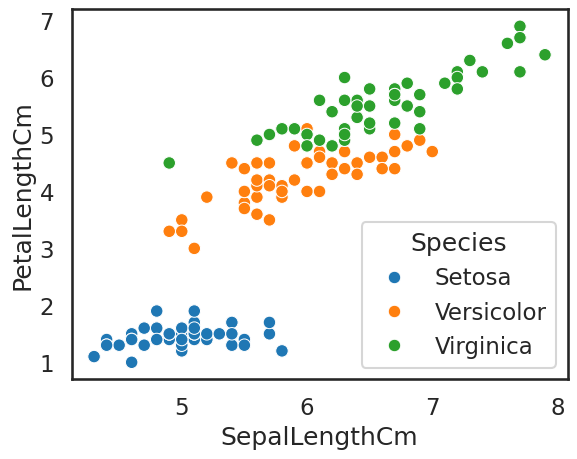

In [35]:
# As our first plot, let's visualize the relationship between sepal length and petal length for each iris.

# We can use a scatter plot for this and color the points based on the 'Species' column - it can be done 
# by passing hue='Species' parameter to the scatterplot function.

sns.set_style('white') # Try 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'
sns.set_context('talk') # Try 'paper', 'poster', 'notebook' and see how it changes the looks

sns.scatterplot(data=iris, x='SepalLengthCm', y='PetalLengthCm', hue='Species')

<Axes: xlabel='Sepal Length (cm)', ylabel='Petal Length (cm)'>

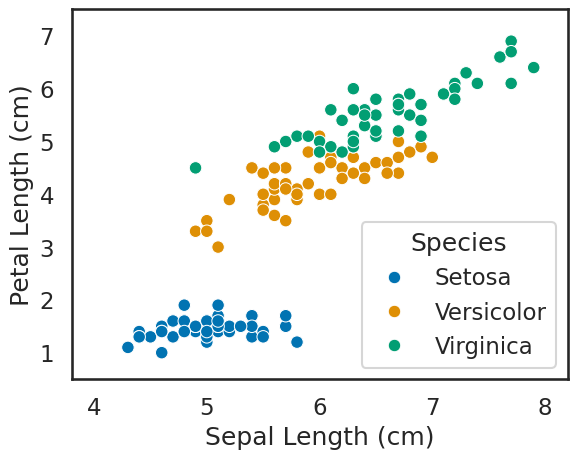

In [39]:
# We can make the plot look even better by adding custom labels and choosing a custom color palette.

# Let's add labels to the x and y axes
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')

# Now let's change the axis limits
plt.xlim(3.8, 8.2)
plt.ylim(0.5, 7.5)

# The palette parameter allows you to choose a color palette for the plot.
sns.scatterplot(data=iris, x='SepalLengthCm', y='PetalLengthCm', hue='Species', palette='colorblind')

Text(0.5, 0, 'Sepal Width (cm)')

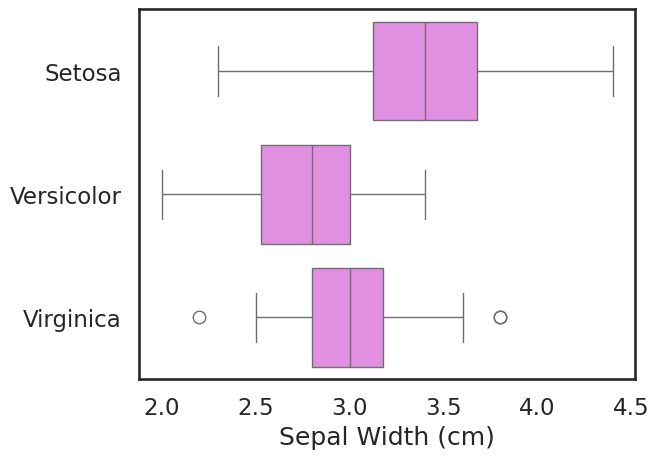

In [61]:
# A boxplot is a standardized way of displaying the distribution of data based on a five-number summary: 
# minimum, first quartile, median, third quartile, and maximum. Let's plot the petal width values 
# using a boxplot.

sns.set_style('white')
sns.set_context('talk')

boxplot = sns.boxplot(data=iris, x='SepalWidthCm', y='Species', color='violet')

plt.ylabel('') # Remove the y-axis label (Species) just to make the plot look cleaner
plt.xlabel('Sepal Width (cm)') # Add the x-axis label

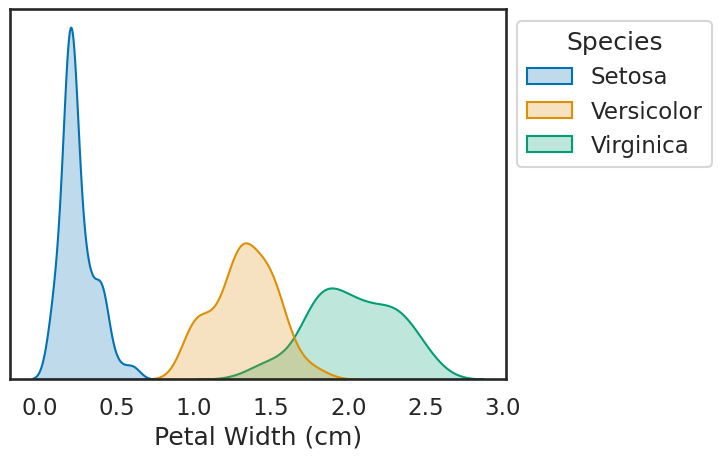

In [60]:
# Let's plot a distribution of the 'PetalWidthCm' values. We can use a kernel density estimate (KDE) plot 
# for this. A KDE plot is a non-parametric way to estimate the probability density function of a random 
# variable. It's like a smoothed version of a histogram!

sns.set_style('white')
sns.set_context('talk')

kdeplot = sns.kdeplot(iris, x='PetalWidthCm', hue='Species', fill=True, palette='colorblind')

# By passing hue='Species' parameter to the kdeplot function, we color the plot based on the 'Variety' 
# column. The fill=True parameter fills the area under the curve with color.

plt.xlabel('Petal Width (cm)') # Add the x-axis label
plt.ylabel('') # Add the y-axis label
plt.yticks([]) # Remove the y-axis ticks

sns.move_legend(kdeplot, "upper left", bbox_to_anchor=(1, 1)) # Move the legend outside the plot

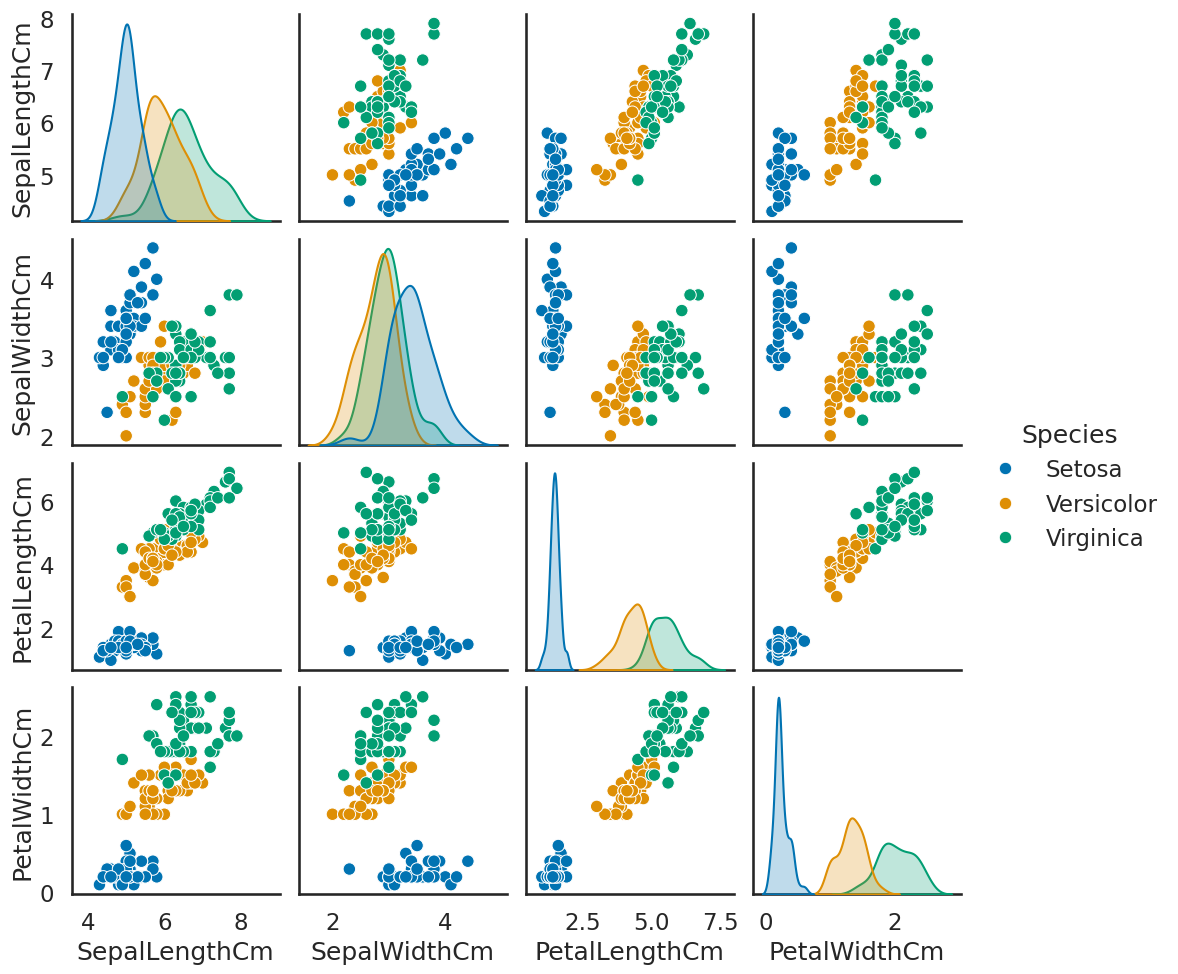

In [62]:
# A pairplot is a great way to explore and visualize relationships between variables in a dataset. 
# It creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. 
# Let's create a pairplot for the iris dataset, coloring the points based on the 'Species' column.

# We select the columns we are interested in seeing
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
iris_selected = iris[columns] # This will return a DataFrame with only the selected columns

pairplot = sns.pairplot(iris_selected, hue='Species', palette='colorblind')

## Exercise 1: Pokemon stats (3 points)

Feel free to work with both [pandas](https://pandas.pydata.org/docs/reference/frame.html) and [seaborn](https://seaborn.pydata.org/tutorial.html) documentation to complete the following tasks.

In this exercise we will work with a dataset containing the stats of different pokemons. The dataset is stored in a CSV file `data/pokemon_data.csv`.

<br/>
<center>
<img src="imgs/pokemon-types.png" height="250">
</center>
<br/>

1. Load the dataset into a DataFrame and take a look at the first few rows. How many different types of pokemons are there in the dataset? (look for them in column 'type1'). List the types.
2. Prepare a pandas DataFrame describing the number of pokemons for each pokemon type (column 'type1'). The first column should contain the types and the second column should contain the number of pokemons of that type. Hint: There is a pandas.DataFrame method that does exactly this in one line of code.
3. Plot a bar chart showing the number of pokemons for ten most common pokemon types. The x-axis should contain the pokemon types and the y-axis should contain the number of pokemons.
4. Prepare a boxplot showing the distribution of 'attack' values for ten most common pokemon types.
5. Prepare a pairplot showing the relationship between 'attack', 'hp' and 'catch_rate' columns for 'Rock', 'Dragon' and 'Bug' pokemon types. Color the points based on the type. Apply a custom color palette to the plot, assigning an appropriate color to each type (see the image above). You will probably want to read the [pairplot documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html) and look for for palette parameter.

In [ ]:
...